# Predicting Low-Income Households in Selected Areas

This project aims to develop predictive models to estimate the number of low-income households in selected areas of Australia using Australian Bureau of Statistics (ABS)  data. These models will provide valuable insights for policymakers, urban planners, and social services to better understand and address socioeconomic challenges.

### Project Objectives

- Develop accurate predictive models for estimating the number of low-income households in selected areas.
- Identify key socioeconomic factors that contribute to the prevalence of low-income households.
- Create visualizations and reports to communicate findings effectively.
- Provide a tool for stakeholders to make data-driven decisions in policy and resource allocation.

### Project Scope

- Focus on predicting low-income households at the Statistical Area Level 2 (SA2) geographic level.
- Utilize ABS  data from the past  period (2021) for model development and validation.
- [WIP] Develop models for all of Australia, with the capability to focus on specific states or regions as needed.

### Data Sources

After consulting the Metadata table from General Community Profiles (GCP) of the Australian  of 2021, 5 datasets were identified to be relevant to the project:
- Selected Medians and Averages - G02
- Total Household Income (Weekly) by Household Composition - G33
- Number of Motor Vehicles by Dwellings - G34
- Household Composition by Number of Persons Usually Resident - G35
- Mortgage Repayment (Monthly) by Dwelling Structure - G38

In [1]:
## Type your name here
name = "yching"

In [2]:
!pip install sasctl
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import packagaes
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import requests
from sasctl import Session
from sasctl.services import model_repository as mr, model_management as mm

In [5]:
# Import data

# Call csv file by name
g02 = pd.read_csv("/workspaces/myfolder/Academic_ViyaWorkbench/data/2021  GCP Statistical Area 2 for AUS/2021_G02_AUST_SA2.csv")
g33 = pd.read_csv("/workspaces/myfolder/Academic_ViyaWorkbench/data/2021  GCP Statistical Area 2 for AUS/2021_G33_AUST_SA2.csv")
g34 = pd.read_csv("/workspaces/myfolder/Academic_ViyaWorkbench/data/2021  GCP Statistical Area 2 for AUS/2021_G34_AUST_SA2.csv")
g35 = pd.read_csv("/workspaces/myfolder/Academic_ViyaWorkbench/data/2021  GCP Statistical Area 2 for AUS/2021_G35_AUST_SA2.csv")
g38 = pd.read_csv("/workspaces/myfolder/Academic_ViyaWorkbench/data/2021  GCP Statistical Area 2 for AUS/2021_G38_AUST_SA2.csv")

# Store DataFrames in a dictionary
gcp = {
    'g02': g02,
    'g33': g33,
    'g34': g34,
    'g35': g35,
    'g38': g38
}

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/myfolder/Academic_ViyaWorkbench/data/2021  GCP Statistical Area 2 for AUS/2021_G02_AUST_SA2.csv'

## Exploratory Data Analysis

Exploratory data analysis (EDA) is crucial in data science projects because it helps us understand the structure and characteristics of the data we're working with. By exploring variables, identifying patterns, detecting anomalies, and visualizing relationships, EDA enables us to make informed decisions about data preprocessing, feature engineering, and model selection. It also plays a key role in uncovering insights and formulating hypotheses, laying the groundwork for more accurate modeling and impactful conclusions.

### Dataset Characteristics

In [3]:
# Function for dataset characteristics
def shape_column(df_name, df):
    # Show dimension and column names of our data
    shape_info = f"DataFrame Name: {df_name}\nShape: {df.shape}\nColumn names: {df.columns.tolist()}\n"
    return print(shape_info)

In [4]:
for df_name, df in gcp.items():
    shape_column(df_name, df)

DataFrame Name: g02
Shape: (2472, 9)
Column names: ['SA2_CODE_2021', 'Median_age_persons', 'Median_mortgage_repay_monthly', 'Median_tot_prsnl_inc_weekly', 'Median_rent_weekly', 'Median_tot_fam_inc_weekly', 'Average_num_psns_per_bedroom', 'Median_tot_hhd_inc_weekly', 'Average_household_size']

DataFrame Name: g33
Shape: (2472, 61)
Column names: ['SA2_CODE_2021', 'Neg_Nil_inc_fam_households', 'Neg_Nil_inc_Non_fam_househlds', 'Negative_Nil_income_Tot', 'HI_1_149_Family_households', 'HI_1_149_Non_family_hseholds', 'HI_1_149_Tot', 'HI_150_299_Family_households', 'HI_150_299_Non_fam_househlds', 'HI_150_299_Tot', 'HI_300_399_Family_households', 'HI_300_399_Non_fam_househlds', 'HI_300_399_Tot', 'HI_400_499_Family_households', 'HI_400_499_Non_fam_househlds', 'HI_400_499_Tot', 'HI_500_649_Family_households', 'HI_500_649_Non_fam_househlds', 'HI_500_649_Tot', 'HI_650_799_Family_households', 'HI_650_799_Non_fam_househlds', 'HI_650_799_Tot', 'HI_800_999_Fam_households', 'HI_800_999_Non_fam_hsehlds',

<div class="alert alert-info" role="alert">
Each dataset has 2472 entries but different variables. There are some overlapping variables which we can address in the data wrangling stage of this project.
</div>

### Visualisations

Dive into each dataset to see what reationships and insight they hold.

#### Selected Medians and Averages - G02

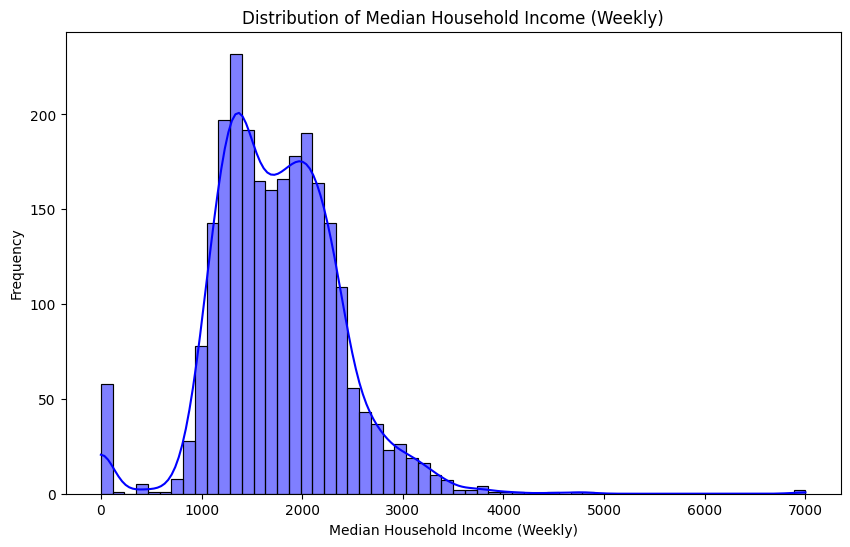

In [43]:
# Distribution of Median Household Income
plt.figure(figsize=(10, 6))
sns.histplot(g02['Median_tot_hhd_inc_weekly'], kde=True, color='blue')
plt.title('Distribution of Median Household Income (Weekly)')
plt.xlabel('Median Household Income (Weekly)')
plt.ylabel('Frequency')
plt.show()


<div class="alert alert-info" role="alert">
    These distribution graphs are able to highlight some very important insight given from the data. Median Household Income concentrates between 1000-2500 AUD, which is a wide range. It is important to mention that there are households that are zero. The disparity is shown in the slight uptick in households making 7000 AUD weekly. As we dive into our investigation and modelling, we choose to keep geographic areas together to have a wholistic view/ However, another projet could dive into how location can impact the results of distributions like these.
</div>

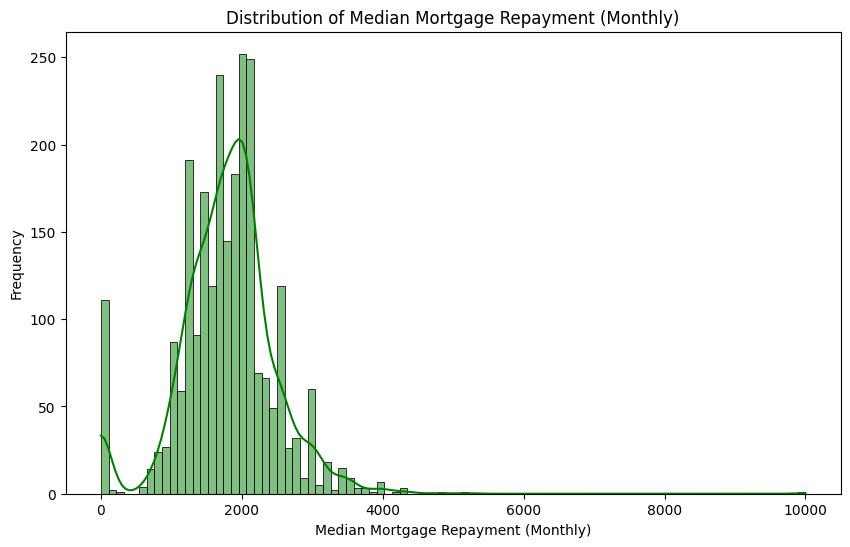

In [42]:
# Distribution of Median Mortgage Repayment
plt.figure(figsize=(10, 6))
sns.histplot(g02['Median_mortgage_repay_monthly'], kde=True, color='green')
plt.title('Distribution of Median Mortgage Repayment (Monthly)')
plt.xlabel('Median Mortgage Repayment (Monthly)')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-info" role="alert">
    Mortgage repayment tends to peake around 2000 AUD, similar to median weekly salary. This can tell us that a hosuehold may, on aerage, be spending 25% of their monthly income on their mortagge repayment. In further investigation, we could take a project to dive into what households actually have mortgages and are they the ones who make 2000 AUD weekly or are the households with higher income represented. 
</div>

#### Total Household Income (Weekly) by Household Composition - G33

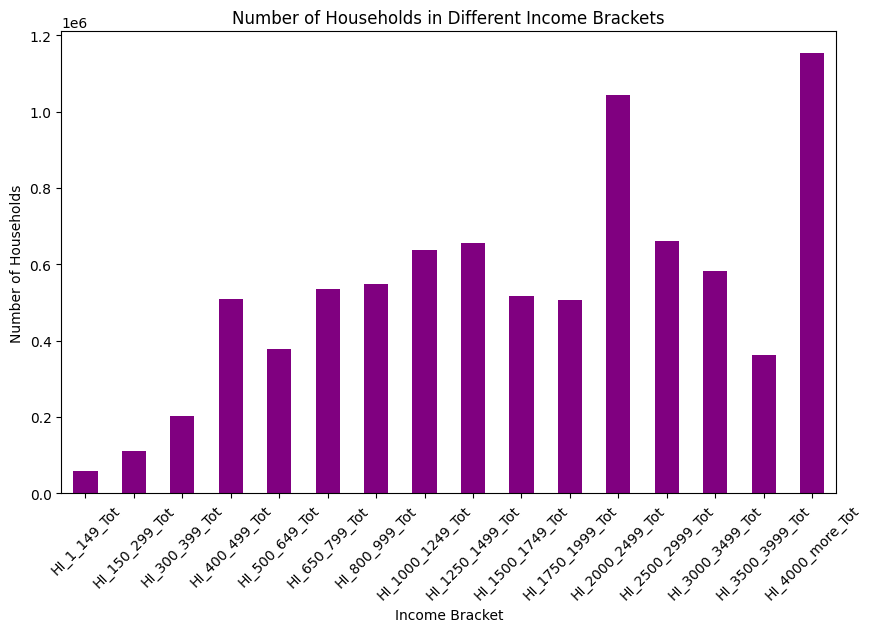

In [7]:
# Visualizing the number of households in different income brackets (for g33 dataset)
income_brackets = ['HI_1_149_Tot', 'HI_150_299_Tot', 'HI_300_399_Tot', 'HI_400_499_Tot', 'HI_500_649_Tot', 'HI_650_799_Tot', 'HI_800_999_Tot', 'HI_1000_1249_Tot', 'HI_1250_1499_Tot', 'HI_1500_1749_Tot', 'HI_1750_1999_Tot', 'HI_2000_2499_Tot', 'HI_2500_2999_Tot', 'HI_3000_3499_Tot', 'HI_3500_3999_Tot', 'HI_4000_more_Tot']  # Example income brackets
income_data = g33[income_brackets].sum()

# Bar plot to visualize income categories
plt.figure(figsize=(10, 6))
income_data.plot(kind='bar', color='purple')
plt.title('Number of Households in Different Income Brackets')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-info" role="alert">
    In the distribution of income brackets, we are able to notice two peaks towards the higher end of the income brackets. This indicates that using the mean income may not be the ideal metric to use for any further analysis but rather using the median.
</div>

#### Number of Motor Vehicles by Dwellings - G34

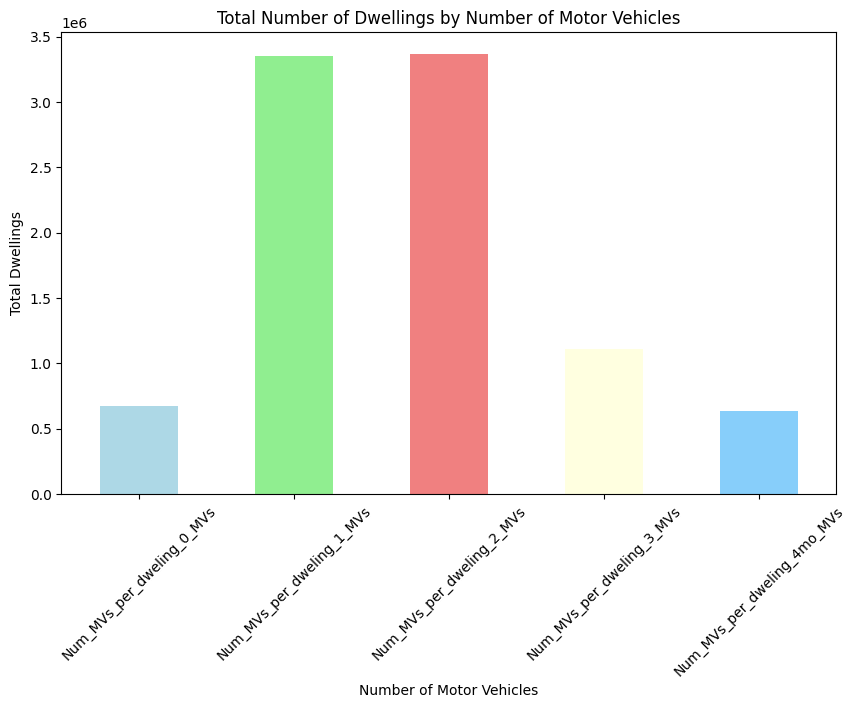

In [8]:
# 1. Plotting the distribution of dwellings based on the number of vehicles (using a stacked bar plot)
vehicle_columns = ['Num_MVs_per_dweling_0_MVs', 'Num_MVs_per_dweling_1_MVs', 
                   'Num_MVs_per_dweling_2_MVs', 'Num_MVs_per_dweling_3_MVs', 
                   'Num_MVs_per_dweling_4mo_MVs']

# Plotting the stacked bar plot for the number of motor vehicles per dwelling
vehicle_data = g34[vehicle_columns].sum()

plt.figure(figsize=(10, 6))
vehicle_data.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightskyblue'])
plt.title('Total Number of Dwellings by Number of Motor Vehicles')
plt.xlabel('Number of Motor Vehicles')
plt.ylabel('Total Dwellings')
plt.xticks(rotation=45)
plt.show()



<div class="alert alert-info" role="alert">
    There are close to equal amount of households that hold one or two vehicles. If we were looking to segment our population, we could incirporate labels for no car, 1-2 car, and 3-4 car to increase simplicity.
</div>

## Data Transformation
We are able to take the insight we took from our exploratory visualisations, as well as project goals, to wrangle our data to prepare it for modelling. In this case, we will select relevant variables, concatenate our dtaat into one dataframe, and ensure this happened correctly.

### Variable Selection

In [9]:
# Select columns in g02
# removing medians of variables explained in other df
g02_filtered =  g02.drop(columns=['Median_mortgage_repay_monthly',
                                 'Median_tot_prsnl_inc_weekly', 
                                 'Median_tot_fam_inc_weekly', 
                                 'Median_tot_hhd_inc_weekly'])

g02_filtered.columns.tolist()

['SA2_CODE_2021',
 'Median_age_persons',
 'Median_rent_weekly',
 'Average_num_psns_per_bedroom',
 'Average_household_size']

In [10]:
# Select columns in g33
# Select columns that contain both "HI_" and "_Tot"
g33_col_mask = g33.columns[g33.columns.str.contains("HI_") & g33.columns.str.contains("_Tot")]

# Append the column name 'SA2_CODE_2021' to the list
g33_col_mask = g33_col_mask.insert(0, 'SA2_CODE_2021')

g33_filtered = g33[g33_col_mask]

g33_filtered.columns.tolist()

['SA2_CODE_2021',
 'HI_1_149_Tot',
 'HI_150_299_Tot',
 'HI_300_399_Tot',
 'HI_400_499_Tot',
 'HI_500_649_Tot',
 'HI_650_799_Tot',
 'HI_800_999_Tot',
 'HI_1000_1249_Tot',
 'HI_1250_1499_Tot',
 'HI_1500_1749_Tot',
 'HI_1750_1999_Tot',
 'HI_2000_2499_Tot',
 'HI_2500_2999_Tot',
 'HI_3000_3499_Tot',
 'HI_3500_3999_Tot',
 'HI_4000_more_Tot']

In [11]:
# Select columns in g34
# drop total and not stated households
g34_filtered = g34.drop(columns=['Num_MVs_per_dweling_Tot', 
                                 'Num_MVs_NS', 
                                 'Total_dwelings'])

g34_filtered.columns.tolist()

['SA2_CODE_2021',
 'Num_MVs_per_dweling_0_MVs',
 'Num_MVs_per_dweling_1_MVs',
 'Num_MVs_per_dweling_2_MVs',
 'Num_MVs_per_dweling_3_MVs',
 'Num_MVs_per_dweling_4mo_MVs']

In [12]:
# Select columns in g35
# Select columns that contain "_Total"
g35_col_mask = g35.columns[g35.columns.str.contains("_Total")]

# drop the last Total column
g35_col_mask = g35_col_mask.drop('Total_Total')

# Append the column name 'SA2_CODE_2021' to the list
g35_col_mask = g35_col_mask.insert(0, 'SA2_CODE_2021')

# Apply filtering mask
g35_filtered = g35[g35_col_mask]

g35_filtered.columns.tolist()

['SA2_CODE_2021',
 'Num_Psns_UR_1_Total',
 'Num_Psns_UR_2_Total',
 'Num_Psns_UR_3_Total',
 'Num_Psns_UR_4_Total',
 'Num_Psns_UR_5_Total',
 'Num_Psns_UR_6mo_Total']

In [13]:
# Select columns in g38
# Select columns that contain both "M_" and "_Tot"
g38_col_mask = g38.columns[g38.columns.str.contains("M_") & g38.columns.str.contains("_Tot")]

# Append the column name 'SA2_CODE_2021' to the list
g38_col_mask = g38_col_mask.insert(0, 'SA2_CODE_2021')

# Apply filtering mask
g38_filtered = g38[g38_col_mask]

g38_filtered.columns.tolist()

['SA2_CODE_2021',
 'M_0_299_Tot',
 'M_300_449_Tot',
 'M_450_599_Tot',
 'M_600_799_Tot',
 'M_800_999_Tot',
 'M_1000_1399_Tot',
 'M_1400_1799_Tot',
 'M_1800_2399_Tot',
 'M_2400_2999_Tot',
 'M_3000_3999_Tot',
 'M_4000_over_Tot']

### Joining dataframes

In [14]:
def merge_dataframes(dataframes, common_column):
    # Start with the first DataFrame
    merged_df = dataframes[0]

    # Iteratively merge the remaining DataFrames
    for df in dataframes[1:]:
        merged_df = merged_df.merge(df, on=common_column, how='inner')

    return merged_df

# Merging filtered df
_joined = merge_dataframes([g02_filtered, g33_filtered, g34_filtered, g35_filtered, g38_filtered], 'SA2_CODE_2021')
_joined.shape

(2472, 43)

### Final data EDA

In [15]:
_joined.dtypes

SA2_CODE_2021                     int64
Median_age_persons                int64
Median_rent_weekly                int64
Average_num_psns_per_bedroom    float64
Average_household_size          float64
HI_1_149_Tot                      int64
HI_150_299_Tot                    int64
HI_300_399_Tot                    int64
HI_400_499_Tot                    int64
HI_500_649_Tot                    int64
HI_650_799_Tot                    int64
HI_800_999_Tot                    int64
HI_1000_1249_Tot                  int64
HI_1250_1499_Tot                  int64
HI_1500_1749_Tot                  int64
HI_1750_1999_Tot                  int64
HI_2000_2499_Tot                  int64
HI_2500_2999_Tot                  int64
HI_3000_3499_Tot                  int64
HI_3500_3999_Tot                  int64
HI_4000_more_Tot                  int64
Num_MVs_per_dweling_0_MVs         int64
Num_MVs_per_dweling_1_MVs         int64
Num_MVs_per_dweling_2_MVs         int64
Num_MVs_per_dweling_3_MVs         int64


In [16]:
_joined.isna().sum()

SA2_CODE_2021                   0
Median_age_persons              0
Median_rent_weekly              0
Average_num_psns_per_bedroom    0
Average_household_size          0
HI_1_149_Tot                    0
HI_150_299_Tot                  0
HI_300_399_Tot                  0
HI_400_499_Tot                  0
HI_500_649_Tot                  0
HI_650_799_Tot                  0
HI_800_999_Tot                  0
HI_1000_1249_Tot                0
HI_1250_1499_Tot                0
HI_1500_1749_Tot                0
HI_1750_1999_Tot                0
HI_2000_2499_Tot                0
HI_2500_2999_Tot                0
HI_3000_3499_Tot                0
HI_3500_3999_Tot                0
HI_4000_more_Tot                0
Num_MVs_per_dweling_0_MVs       0
Num_MVs_per_dweling_1_MVs       0
Num_MVs_per_dweling_2_MVs       0
Num_MVs_per_dweling_3_MVs       0
Num_MVs_per_dweling_4mo_MVs     0
Num_Psns_UR_1_Total             0
Num_Psns_UR_2_Total             0
Num_Psns_UR_3_Total             0
Num_Psns_UR_4_

## Modelling

In this project, we are modelling to predict the number of low income households specifically within those who make 300-3999 AUD weekly. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#!pip install xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
from sklearn.model_selection import GridSearchCV

In [18]:
# Prepare features and target
def prepare_features(df, target):
    features = df.columns.drop(target)
    X = df[features]
    y = df[target]
    return X, y

In [19]:
X, y = prepare_features(_joined, 'HI_300_399_Tot')
X.columns

Index(['SA2_CODE_2021', 'Median_age_persons', 'Median_rent_weekly',
       'Average_num_psns_per_bedroom', 'Average_household_size',
       'HI_1_149_Tot', 'HI_150_299_Tot', 'HI_400_499_Tot', 'HI_500_649_Tot',
       'HI_650_799_Tot', 'HI_800_999_Tot', 'HI_1000_1249_Tot',
       'HI_1250_1499_Tot', 'HI_1500_1749_Tot', 'HI_1750_1999_Tot',
       'HI_2000_2499_Tot', 'HI_2500_2999_Tot', 'HI_3000_3499_Tot',
       'HI_3500_3999_Tot', 'HI_4000_more_Tot', 'Num_MVs_per_dweling_0_MVs',
       'Num_MVs_per_dweling_1_MVs', 'Num_MVs_per_dweling_2_MVs',
       'Num_MVs_per_dweling_3_MVs', 'Num_MVs_per_dweling_4mo_MVs',
       'Num_Psns_UR_1_Total', 'Num_Psns_UR_2_Total', 'Num_Psns_UR_3_Total',
       'Num_Psns_UR_4_Total', 'Num_Psns_UR_5_Total', 'Num_Psns_UR_6mo_Total',
       'M_0_299_Tot', 'M_300_449_Tot', 'M_450_599_Tot', 'M_600_799_Tot',
       'M_800_999_Tot', 'M_1000_1399_Tot', 'M_1400_1799_Tot',
       'M_1800_2399_Tot', 'M_2400_2999_Tot', 'M_3000_3999_Tot',
       'M_4000_over_Tot'],
     

### Train/Test Split

We split our dataset into training and testing splits in order to ensure our model is being trained without knowing our target variable and having all the information. This is done so the model can be more robust to unseen data, which would be new household data in our case. The testing spilt will then determine our model's performance as the predicted values of our target variable are then compared to actual results.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape, "\n" + "Validation data shape:", X_test.shape)

Training data shape: (1977, 42) 
Validation data shape: (495, 42)


### Model Pipeline

Let us made the modelling process more intiutive by creating a function that brings in any necesary parameters for modelling. It will evaluate our models as well. This pipeline will work for open-source and SAS models.

In [21]:
def create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, regressor):
    # Create the pipeline with the specified regressor
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
        ('regressor', regressor)        # The regressor passed as an argument
    ])

    # Start the timer
    start_time = time.time()

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Stop the timer
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display evaluation metrics
    print(f"Regressor: {regressor.__class__.__name__}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Time elapsed: {elapsed_time:.2f} seconds")

### Open-Sourced modelling packages

In [22]:
# To use the function with different regressors:
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             RandomForestRegressor(n_estimators=100, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             SVR(kernel='poly', C=1.0, epsilon=0.1))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))

Regressor: RandomForestRegressor
Mean Absolute Error: 10.76
Mean Squared Error: 258.35
R² Score: 0.94
Time elapsed: 4.05 seconds
Regressor: GradientBoostingRegressor
Mean Absolute Error: 10.49
Mean Squared Error: 234.26
R² Score: 0.95
Time elapsed: 1.48 seconds
Regressor: ElasticNet
Mean Absolute Error: 13.29
Mean Squared Error: 414.19
R² Score: 0.91
Time elapsed: 0.03 seconds
Regressor: SVR
Mean Absolute Error: 28.24
Mean Squared Error: 1704.91
R² Score: 0.61
Time elapsed: 0.21 seconds
Regressor: XGBRegressor
Mean Absolute Error: 10.34
Mean Squared Error: 230.17
R² Score: 0.95
Time elapsed: 0.14 seconds


<div class="alert alert-info" role="alert">
Our best open source model is XGBRegressor (Extreme Gradient Boosting)!
</div>

### SAS ML models

SAS has released a proprietary Python package named sasviya.ml that contains optimized SAS machine learning algorithms designed to run in SAS Viya Workbench.

https://go.documentation.sas.com/doc/en/workbenchcdc/v_001/explore/titlepage.htm

In [23]:
#fit a random forest model
from sasviya.ml.tree import ForestRegressor as sas_ForestRegressor
from sasviya.ml.tree import GradientBoostingRegressor as sas_GradientBoostingRegressor
from sasviya.ml.linear_model import ElasticNet as sas_ElasticNet
from sasviya.ml.svm import SVR as sas_SVR
from sasviya.ml.decomposition import PCA as sas_PCA

In [24]:
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             sas_ForestRegressor(n_estimators=100, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             sas_GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             sas_ElasticNet(alpha=1.0, l1_ratio=0.5)) # no random_state parameter
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             sas_SVR(kernel='poly', C=1.0, epsilon=0.1))

Regressor: ForestRegressor
Mean Absolute Error: 11.39
Mean Squared Error: 367.70
R² Score: 0.92
Time elapsed: 0.69 seconds
Regressor: GradientBoostingRegressor
Mean Absolute Error: 10.23
Mean Squared Error: 232.50
R² Score: 0.95
Time elapsed: 0.23 seconds
Regressor: ElasticNet
Mean Absolute Error: 13.29
Mean Squared Error: 414.27
R² Score: 0.91
Time elapsed: 0.16 seconds
Regressor: SVR
Mean Absolute Error: 9.91
Mean Squared Error: 208.36
R² Score: 0.95
Time elapsed: 0.62 seconds


<div class="alert alert-info" role="alert">
Our best SAS model is SVR (Support Vector Regression)!
</div>

## Model Tuning

Also known as hyperparameter tuning. This step will ensure we have the best parameters set for our model by test and evaluting a set of parameters. 

### Open Source

In [25]:
## Open source champion tuning
# Define the model
xgb = XGBRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', xgb)
    ]),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (neg MSE): {grid_search.best_score_}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
Best cross-validation score (neg MSE): -200.58361522627115


In [26]:
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             grid_search.best_estimator_)

Regressor: Pipeline
Mean Absolute Error: 10.55
Mean Squared Error: 231.63
R² Score: 0.95
Time elapsed: 0.10 seconds


### SAS

We are incorporating Principal Component Analysis (PCA) to enable our best model to have a clear selection of essential features. This means we will have two tuned models. One with and one without PCA.

In [27]:
## SAS champion model tuning
# Specify the number of principal components to keep
n_components = 20

# using PCA to for feature selection
pca = sas_PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.describe()

[Key]

               Store Key                
 
                                      Key
 DE80C7A447C37A2D2A23D212A37F67B58620316B

[Description]

        Basic Information         
 
       Attribute              Value
 Analytic Engine                pca
    Time Created 02Dec2024:04:51:24

[InputVariables]

                           Input Variables                            
 
                         Name  Length  Role     Type RawType FormatName
                SA2_CODE_2021     8.0 Input Interval     Num           
           Median_age_persons     8.0 Input Interval     Num           
           Median_rent_weekly     8.0 Input Interval     Num           
 Average_num_psns_per_bedroom     8.0 Input Interval     Num           
       Average_household_size     8.0 Input Interval     Num           
                 HI_1_149_Tot     8.0 Input Interval     Num           
               HI_150_299_Tot     8.0 Input Interval     Num           
               HI_400_499_Tot     8.0 Input Interval     Num           
               HI_500_649_Tot     8.0 Input Interval     Num           
               HI_650_799_Tot     8.0 Input Interval     Num           
               HI_800_999_Tot     8.0 Input Interval     Num           
             HI_1000_1249_Tot     8.0 Input Interval     Num           
             HI_1250_1499_Tot     8.0 Input Interval     Num           
             HI_1500_1749_Tot     8.0 Input Interval     Num           
             HI_1750_1999_Tot     8.0 Input Interval     Num           
             HI_2000_2499_Tot     8.0 Input Interval     Num           
             HI_2500_2999_Tot     8.0 Input Interval     Num           
             HI_3000_3499_Tot     8.0 Input Interval     Num           
             HI_3500_3999_Tot     8.0 Input Interval     Num           
             HI_4000_more_Tot     8.0 Input Interval     Num           
    Num_MVs_per_dweling_0_MVs     8.0 Input Interval     Num           
    Num_MVs_per_dweling_1_MVs     8.0 Input Interval     Num           
    Num_MVs_per_dweling_2_MVs     8.0 Input Interval     Num           
    Num_MVs_per_dweling_3_MVs     8.0 Input Interval     Num           
  Num_MVs_per_dweling_4mo_MVs     8.0 Input Interval     Num           
          Num_Psns_UR_1_Total     8.0 Input Interval     Num           
          Num_Psns_UR_2_Total     8.0 Input Interval     Num           
          Num_Psns_UR_3_Total     8.0 Input Interval     Num           
          Num_Psns_UR_4_Total     8.0 Input Interval     Num           
          Num_Psns_UR_5_Total     8.0 Input Interval     Num           
        Num_Psns_UR_6mo_Total     8.0 Input Interval     Num           
                  M_0_299_Tot     8.0 Input Interval     Num           
                M_300_449_Tot     8.0 Input Interval     Num           
                M_450_599_Tot     8.0 Input Interval     Num           
                M_600_799_Tot     8.0 Input Interval     Num           
                M_800_999_Tot     8.0 Input Interval     Num           
              M_1000_1399_Tot     8.0 Input Interval     Num           
              M_1400_1799_Tot     8.0 Input Interval     Num           
              M_1800_2399_Tot     8.0 Input Interval     Num           
              M_2400_2999_Tot     8.0 Input Interval     Num           
              M_3000_3999_Tot     8.0 Input Interval     Num           
              M_4000_over_Tot     8.0 Input Interval     Num           

[OutputVariables]

    Output Variables     
 
   Name  Length Type Label
  Prin1     8.0  Num      
  Prin2     8.0  Num      
  Prin3     8.0  Num      
  Prin4     8.0  Num      
  Prin5     8.0  Num      
  Prin6     8.0  Num      
  Prin7     8.0  Num      
  Prin8     8.0  Num      
  Prin9     8.0  Num      
 Prin10     8.0  Num      
 Prin11     8.0  Num      
 Prin12     8.0  Num      
 Prin13     8.0  Num      
 Prin14     8.0  Num      
 Prin15     8.0  Num      
 Prin16     8.0  Num      
 Prin17   

In [44]:
# Define the SVR model
sas_svr = sas_SVR(kernel='poly', random_state=42)

# Set up the parameter grid
param_grid = {
    'regressor__C': [0.1, 1.0, 10.0],
    'regressor__epsilon': [0.01, 0.1, 0.2],
    'regressor__degree': [2, 3, 4],  # Only relevant for polynomial kernel
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', sas_svr)
    ]),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid_search.fit(X_train_pca, y_train) # using features from PCA

# Display the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (neg MSE): {grid_search.best_score_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'regressor__C': 1.0, 'regressor__degree': 2, 'regressor__epsilon': 0.1}
Best cross-validation score (neg MSE): -223.0534242991439


In [29]:
create_and_evaluate_pipeline(X_train_pca, X_test_pca, y_train, y_test, 
                             grid_search.best_estimator_)

Regressor: Pipeline
Mean Absolute Error: 10.09
Mean Squared Error: 248.41
R² Score: 0.94
Time elapsed: 0.16 seconds


In [45]:
# Define the SVR model
sas_svr = sas_SVR(kernel='poly', random_state=42)

# Set up the parameter grid
param_grid = {
    'regressor__C': [0.1, 1.0, 10.0],
    'regressor__epsilon': [0.01, 0.1, 0.2],
    'regressor__degree': [2, 3, 4],  # Only relevant for polynomial kernel
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', sas_svr)
    ]),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid_search.fit(X_train, y_train) # using not selected features

# Display the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (neg MSE): {grid_search.best_score_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


2024-12-02 05:01:39,809 [ERROR   ] [151 ][_action.py     ] The total feature dimension (42) is high for polynomial degree 3.
2024-12-02 05:01:39,809 [ERROR   ] [151 ][_action.py     ] The dimension is too high to process.
2024-12-02 05:01:39,879 [ERROR   ] [151 ][_action.py     ] The total feature dimension (42) is high for polynomial degree 3.
2024-12-02 05:01:39,879 [ERROR   ] [151 ][_action.py     ] The dimension is too high to process.
2024-12-02 05:01:39,910 [ERROR   ] [151 ][_action.py     ] The total feature dimension (42) is high for polynomial degree 3.
2024-12-02 05:01:39,911 [ERROR   ] [151 ][_action.py     ] The dimension is too high to process.
2024-12-02 05:01:39,914 [ERROR   ] [151 ][_action.py     ] The total feature dimension (42) is high for polynomial degree 3.
2024-12-02 05:01:39,914 [ERROR   ] [151 ][_action.py     ] The dimension is too high to process.
2024-12-02 05:01:39,979 [ERROR   ] [151 ][_action.py     ] The total feature dimension (42) is high for polynomi

Best parameters: {'regressor__C': 0.1, 'regressor__degree': 2, 'regressor__epsilon': 0.1}
Best cross-validation score (neg MSE): -203.11472253080365


In [31]:
create_and_evaluate_pipeline(X_train, X_test, y_train, y_test, 
                             grid_search.best_estimator_)

Regressor: Pipeline
Mean Absolute Error: 9.72
Mean Squared Error: 209.21
R² Score: 0.95
Time elapsed: 0.61 seconds



<div class="alert alert-info" role="alert">
    Best model is the SAS SVR model before PCA. Model tuning slightly reduced the MAE and sped up compute time, but MSE increased and no imporvement to R^2.
</div>

## Model Registration and Deployment 
Models built on Workbench, whether they are scikit-learn models or SAS Viya ML models can be registered into the model repository on Viya (SAS Model Manager). This is a crucial step in ensuring that models can be goverened properly as corporate assets before being pushed into production.

Let's look at examples of how to register a SAS Viya ML model.

In [47]:
name = "tztsai"

In [48]:
# best performing model
regressor = sas_SVR(kernel='poly', C=1.0, epsilon=0.1)

# Create the pipeline with the specified regressor
wb_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing the data
    ('regressor', regressor)        # The regressor passed as an argument
])
# Fit the model
wb_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', SVR(kernel="poly", epsilon=0.1))])

In [49]:
wb_model = sas_SVR(kernel='poly', C=1.0, epsilon=0.1)
# Fit the model
wb_model.fit(X_train, y_train)

SVR(kernel="poly", epsilon=0.1)

In [50]:
## get access token for viya env using refresh token. change to your own viya server and preferred authentication method.
url = "https://apgtps2demo.gtp.unx.sas.com"
auth_url = f"{url}/SASLogon/oauth/token"
## reading long-lived refresh token from txt file
refresh_token = Path(f'/workspaces/{os.environ["DEFAULT_MOUNTNAME"]}/Academic_ViyaWorkbench/apgtps2demo_refresh_token.txt').read_text().replace('\n', '')

payload=f'grant_type=refresh_token&refresh_token={refresh_token}'
headers = {
  'Accept': 'application/json',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Authorization': 'Basic c2FzLmNsaTo=',
}

response = requests.request("POST", auth_url, headers=headers, data=payload, verify=False)
access_token = response.json()['access_token']

In [51]:
st = Session("https://apgtps2demo.gtp.unx.sas.com", token=access_token, verify_ssl=False)
st

In [52]:
project_name = "Academic WorkshopWorkbench HandsOn "+name

In [53]:
## Create a project
try:
    repository = mr.get_repository('DMRepository')
    # repository.name
    project_create = mr.create_project(
        {
        'name':project_name,
        'description':'Academic WB Hands-on Exercise',
        'function':'classification',
        'targetLevel':'binary',
        },
        repository
    )
    print("Created a new project!")
    project = mr.get_project(project_name)
except:
    print("Retrieving already created project")
    project = mr.get_project(project_name)

/usr/local/lib/python3.11/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'apgtps2demo.gtp.unx.sas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Created a new project!


In [54]:
def register_model(model_name, model, project):
    model_params = {
        "name": model_name,
        "projectId": project.id,
        "type": "ASTORE",
    }
    astore = mr.post(
        "/models",
        files={"files": (f"{model_name}.astore", model.export())},
        data=model_params,
    )
    print(astore)

In [55]:
# Model Registration
register_model("MyModel "+name, wb_model, project) 

MyModel tztsai
